In [1]:
import intake

In [2]:
cat = intake.open_catalog("https://data.nextgems-h2020.eu/catalog.yaml")

In [3]:
print(list(cat['FESOM']))

['IFS_4.4-FESOM_5-cycle3', 'IFS_28-FESOM_25-cycle3', 'IFS_9-FESOM_5-cycle3', 'FESOM_13_tropo_age_interpolated']


In [4]:
print(list(cat['FESOM']['FESOM_13_tropo_age_interpolated']))

['2D_1h_0.1deg', '3D_1h_0.1deg', '2D_1h_0.5deg', '3D_1h_0.5deg_full', '3D_1h_0.5deg_half']


In [11]:
data = cat['FESOM']['FESOM_13_tropo_age_interpolated']['3D_1h_0.1deg'].to_dask()

In [12]:
data

<xarray.Dataset>
Dimensions:    (time: 2928, depth: 62, lat: 400, lon: 751)
Coordinates:
  * depth      (depth) float64 0.0 2.0 4.1 6.3 ... 1.33e+03 1.5e+03 1.7e+03
  * lat        (lat) float64 -9.95 -9.85 -9.75 -9.65 ... 29.65 29.75 29.85 29.95
    latitude   (time, lat, lon) float64 dask.array<chunksize=(1, 400, 751), meta=np.ndarray>
  * lon        (lon) float64 -60.0 -59.9 -59.8 -59.7 ... 14.7 14.8 14.9 15.0
    longitude  (time, lat, lon) float64 dask.array<chunksize=(1, 400, 751), meta=np.ndarray>
  * time       (time) datetime64[ns] 2020-01-01T02:54:00 ... 2020-12-31T23:54:00
Data variables:
    Av         (time, depth, lat, lon) float32 dask.array<chunksize=(12, 13, 80, 151), meta=np.ndarray>
    Kv         (time, depth, lat, lon) float32 dask.array<chunksize=(12, 13, 80, 151), meta=np.ndarray>
    N2         (time, depth, lat, lon) float32 dask.array<chunksize=(12, 13, 80, 151), meta=np.ndarray>
    Ri         (time, depth, lat, lon) float32 dask.array<chunksize=(12, 13, 80, 151), meta=np.ndarray>
    salt       (time, depth, lat, lon) float32 dask.array<chunksize=(12, 13, 80, 151), meta=np.ndarray>
    shear      (time, depth, lat, lon) float32 dask.array<chunksize=(12, 13, 80, 151), meta=np.ndarray>
    temp       (time, depth, lat, lon) float32 dask.array<chunksize=(12, 13, 80, 151), meta=np.ndarray>
    tke        (time, depth, lat, lon) float32 dask.array<chunksize=(12, 13, 80, 151), meta=np.ndarray>
    tra_1007   (time, depth, lat, lon) float32 dask.array<chunksize=(12, 13, 80, 151), meta=np.ndarray>
    unod       (time, depth, lat, lon) float32 dask.array<chunksize=(12, 13, 80, 151), meta=np.ndarray>
    vnod       (time, depth, lat, lon) float32 dask.array<chunksize=(12, 13, 80, 151), meta=np.ndarray>
    w          (time, depth, lat, lon) float32 dask.array<chunksize=(12, 13, 80, 151), meta=np.ndarray>
Attributes: (12/22)
    FESOM_ClimateDataPath:               /work/ab0995/a270206/iage/data/ready...
    FESOM_MeshPath:                      /work/ab0995/a270088/meshes/tropotes...
    FESOM_autorotate_back_to_geo:        -1
    FESOM_evp_rheol_steps:               120
    FESOM_force_rotation:                -1
    FESOM_git_SHA:                       86d8cc19
    ...                                  ...
    FESOM_which_ALE:                     zstar
    box:                                 trop
    data:                                /work/ab0995/a270206/iage/results/Av...
    influence:                           15000.0
    interp:                              nn
    meshpath:                            /work/ab0995/a270088/meshes/tropotes...

# Quick Plots:

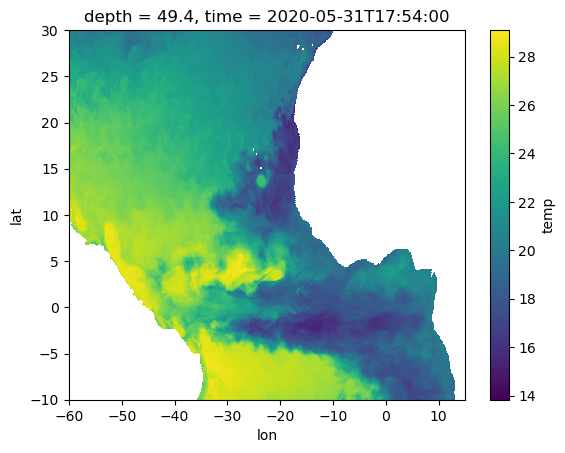

In [37]:
data.temp.sel(depth = 50, time = '2020-05-31T18', method = 'nearest').plot()

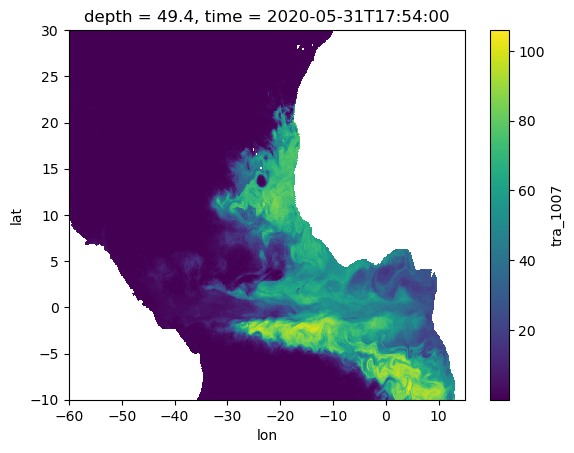

In [127]:
data.tra_1007.sel(depth = 50, time = '2020-05-31T18', method = 'nearest').plot()

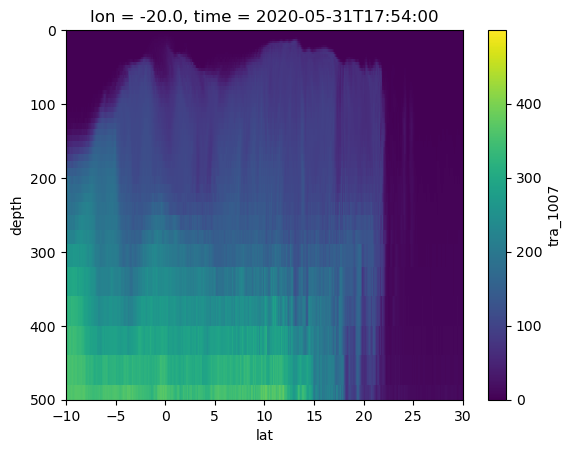

In [135]:
data.tra_1007.sel(lon=-20,
                  time = '2020-05-31T18',
                  method = 'nearest').plot(ylim=(500,0),
                                           yincrease=False)

# More Aesthetically Pleasing Maps:

In [105]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt

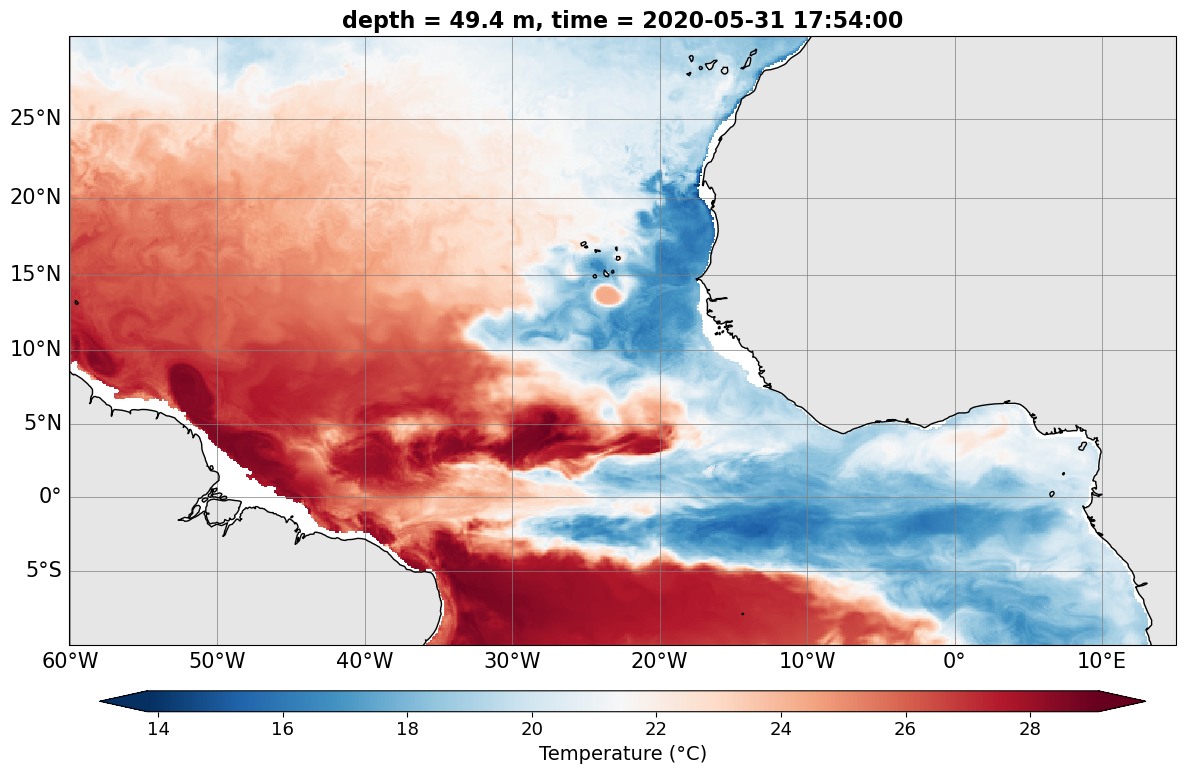

In [124]:
depth=50
time = '2020-05-31T18'
colorbar_label = "Temperature (°C)"

working_projection = getattr(ccrs, "Mercator")()
p = data.temp.sel(depth = depth, time = time, method = 'nearest').plot(subplot_kws=dict(projection=working_projection),
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"shrink": 0.9,
                     "pad": 0.06,
                     "aspect": 50,
                     "orientation": "horizontal",
                     "label": colorbar_label},
        figsize=(15,10),
        extend='both',
        cmap=cm.RdBu_r)

p.axes.add_feature(cfeature.LAND, facecolor=[0.9, 0.9, 0.9])
p.axes.add_feature(cfeature.COASTLINE, lw=1,zorder=4)

gl = p.axes.gridlines(draw_labels=True,linewidth=0.5, color='gray')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

# Finer heading customization
p.axes.set_title(
    'depth = '
    +
    str(data.depth.sel(depth = depth, method = 'nearest').values)
    + ' m, time = ' +
    pd.to_datetime(str(data.time.sel(time = time, method = 'nearest').values)).strftime('%Y-%m-%d %H:%M:%S'),
    fontsize=16,
    fontweight='bold'
    )

# If you whant to set the colorbar fontsizes
cbar = p.colorbar
cbar.set_label(colorbar_label, size=14)
cbar.ax.tick_params(labelsize=13)



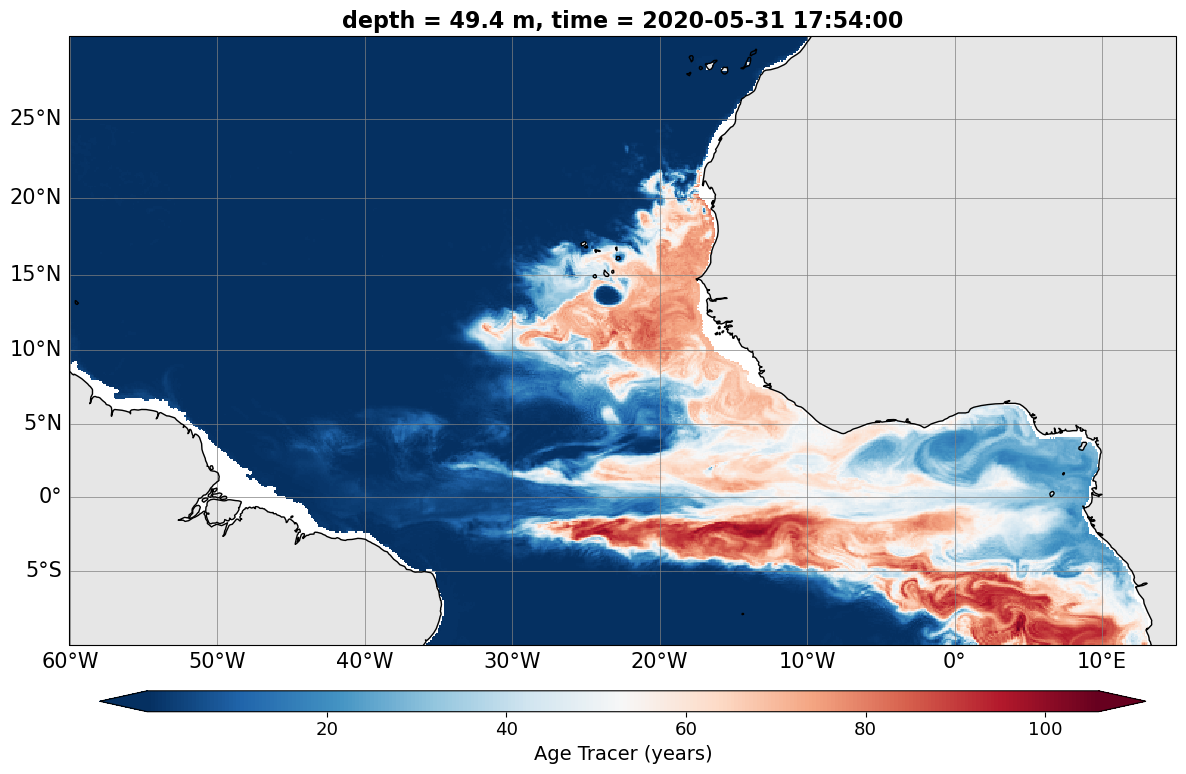

In [125]:
depth=50
time = '2020-05-31T18'
colorbar_label = "Age Tracer (years)"

working_projection = getattr(ccrs, "Mercator")()
p = data.tra_1007.sel(depth = depth, time = time, method = 'nearest').plot(subplot_kws=dict(projection=working_projection),
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"shrink": 0.9,
                     "pad": 0.06,
                     "aspect": 50,
                     "orientation": "horizontal",
                     "label": colorbar_label},
        figsize=(15,10),
        extend='both',
        cmap=cm.RdBu_r)

p.axes.add_feature(cfeature.LAND, facecolor=[0.9, 0.9, 0.9])
p.axes.add_feature(cfeature.COASTLINE, lw=1,zorder=4)

gl = p.axes.gridlines(draw_labels=True,linewidth=0.5, color='gray')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

# Finer heading customization
p.axes.set_title(
    'depth = '
    +
    str(data.depth.sel(depth = depth, method = 'nearest').values)
    + ' m, time = ' +
    pd.to_datetime(str(data.time.sel(time = time, method = 'nearest').values)).strftime('%Y-%m-%d %H:%M:%S'),
    fontsize=16,
    fontweight='bold'
    )

# If you whant to set the colorbar fontsizes
cbar = p.colorbar
cbar.set_label(colorbar_label, size=14)
cbar.ax.tick_params(labelsize=13)

